# One way ANOVA

In [1]:
import numpy as np
from scipy import stats
import scipy.stats
import pandas as pd
import statsmodels.api as sm

import matplotlib.pyplot as plt
import matplotlib
matplotlib.rc('axes',unicode_minus = False)

In [2]:
data = pd.read_csv("ANOVA.csv")

In [3]:
data.head()

,time,charge,gangjong,type
0,32.2,A,a,a
1,30.4,B,a,a
2,33.6,C,a,a
3,36.4,D,a,a
4,33.9,E,a,a


In [4]:
df = pd.pivot_table(data,  index = 'charge',values = 'time', columns = 'gangjong')
df

gangjong,a,b,c,d
charge,,,,
A,32.2,33.1,32.6,26.7
B,30.4,29.9,32.7,28.5
C,33.6,31.7,29.3,30.9
D,36.4,27.5,25.9,26.2
E,33.9,34.0,31.1,32.3
F,34.9,30.7,23.8,23.7


In [5]:
f_result = stats.f_oneway(df['a'],df['b'],df['c'], df['d'])

f, p = f_result.statistic.round(3), f_result.pvalue.round(3)

print("One-way")
print("F 통계량 : {}".format(f))
print("p-value : {}".format(p))


One-way
F 통계량 : 4.172
p-value : 0.019


1. 가설 수립 <br>
H0: 강종별 2차정련 시간에 차이가 없다.
H1: 적어도 두 개이상의 강종별 2차정련 시간에 차이가 있다.
2. p-value = 0.019로 유의수준 0.05에서 귀무가설을 기각 하므로 적어도 두 개 이상의 강종별 2차정련 시간에 차이가 있다고 할 수 있다.

# 상관분석

In [6]:
strength = [37.6,38.6,37.2,36.4,38.6,39,37.2,36.1,35.9,37.1,36.9,37.5,36.3,38.1,39,36.9,36.8,37.6,33,33.5]
temp = [14,15,14,16,17,14,17,16,15,16,14,16,18,13,15,17,14,16,20,21]

corr, pval = stats.pearsonr(strength,temp)

print("Correlation Analysis")
print("coff: {0:0.3f}".format(corr))
print("p-value : {0:0.3f}".format(pval))

Correlation Analysis
coff: -0.723
p-value : 0.000


1. 가설 수립 <br>
H0: 초코칩의 강도와 재료 반죽온도 간에 상관계수는 0이다. <br>
H1: 초코칩의 강도와 재료 반죽온도 간에 상관계수는 0이 아니다. 즉, 서로 상관이 있다.

2. p-value 0으로 유의수준 0.05에서 귀무가설을 기각하므로 초코칩의 강도와 재료 반죽온도 간에 상관성이 있다고 할 수 있다. <br>
상관계수가 음의 값인 -0.723인 것으로 보아 재료반죽 온도가 높을 수록 초코칩의 강도가 낮다고 해석할 수 있다.

# 단순선형회귀

In [8]:
strength = [37.6,38.6,37.2,36.4,38.6,39,37.2,36.1,35.9,37.1,36.9,37.5,36.3,38.1,39,36.9,36.8,37.6,33,33.5]
baking_time = [0.798922,0.84902,0.816163,0.758266,0.815894,0.807477,0.809068,0.7664,0.742243,0.751118,0.740629,
               0.751495,0.738863,0.827428,0.818172,0.740939,0.757128,0.804695,0.695121,0.735377]

time = sm.add_constant(baking_time)
model = sm.OLS(strength, time)
result = model.fit()

print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.627
Method:                 Least Squares   F-statistic:                     32.90
Date:                Mon, 27 Jan 2020   Prob (F-statistic):           1.95e-05
Time:                        21:58:59   Log-Likelihood:                -26.431
No. Observations:                  20   AIC:                             56.86
Df Residuals:                      18   BIC:                             58.85
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.0013      4.184      3.108      0.0

회귀식은 strength = 30.8722baking_time+13.0013 <br>
R_squuared 값 64.6%의 설명력을 가지고 있다. 회귀모형의 설명력이 좋다고 할 수는 없다. <br>
F-statistic의 값 32.9이고 p_value값1.95e-05은 유의수준  0.05보다 작으므로 x1 = baking_time의 회귀계수가 유의하다고 할 수 있다. <br>
즉, 초코칩을 굽는 시간이 초코칩의 강도에 영향을 미친다고 할 수 있다.

(0.9530239105224609, 0.4153335988521576)

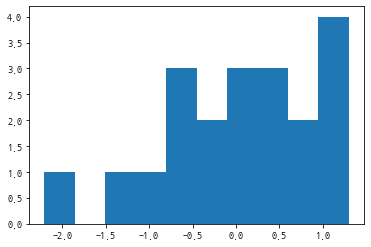

In [9]:
plt.hist(result.resid) #정규성검정

from scipy.stats import shapiro
shapiro(result.resid)

shapiro의 pvalue 값이 0.415이므로 유의수준 0.05에서 귀무가설인 정규성을 만족한다를 기각하지 못하므로 잔차는 정규성을 만족한다고 할 수 있다.

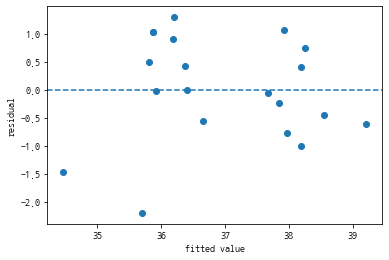

In [13]:
plt.scatter(result.fittedvalues, result.resid)#등분산성검정
plt.xlabel("fitted value")
plt.ylabel("residual")
plt.axhline(y=0, linestyle="--")

수평축의 0을 중심으로 대칭적으로 랜덤하게 나타나지 않고 +2,-2 범위 내에 없기 때문에 등분산성을 만족하지 않는다.

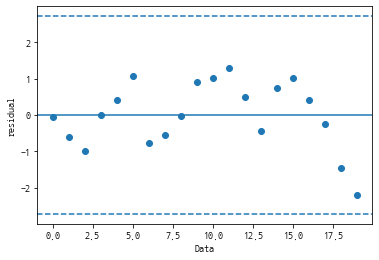

In [14]:
plt.scatter(range(0,20), result.resid, marker="o") #독립성 검정
plt.xlabel("Data")
plt.ylabel("residual")
plt.axhline(y=0, linestyle="-")
plt.axhline(y = 3*np.std(result.resid), linestyle="--")
plt.axhline(y = -3*np.std(result.resid), linestyle="--")

가로축의 변화에 따라 일정한 규칙을 가지고 있는 것으로 보아 독립성을 만족한다고 할 수 없다.
또한, Durbin_watson 의 값이 0.765이므로 2보다는 0에 가깝기 때문에 양의 상관을 가진다.    

따라서 잔차의 정규성은 만족하지만, 독립성, 등분산성의 가정을 만족하지 않으므로 회귀모형을 쓰기에는 적합하지 않다고 할 수 있다.